In [1]:
# -------------------------------------------------------
# Assignment 2
# Written by Bo Zhang
# For COMP 472 Section  – Summer 2021
# -------------------------------------------------------- 
import pandas as pd
from bs4 import BeautifulSoup 
import requests
import math
from textblob import TextBlob

In [2]:
year=[]
name=[]
link=[]
# function to get the information for data.csv
def getinfo(url):
    result = requests.get(url)
    html = result.text
    bs = BeautifulSoup(html,'html.parser')

    bsreal=bs.find('div',class_='list detail eplist')
    for date in bsreal.find_all(class_='airdate'):
        # print(date)
        years=date.string.split(' ')[14].replace('\n','')
        # print(years)
        year.append(years)
    # for episodes in bs.find_all(class_='airdate'):
    #     print (episodes.string)
    for episodes in bsreal.find_all('strong'):
        name.append(episodes.string)
        if episodes.a['href']:
            link.append(episodes.a['href'])  
getinfo("https://www.imdb.com/title/tt0108778/episodes?season=1")
getinfo("https://www.imdb.com/title/tt0108778/episodes?season=2")
getinfo("https://www.imdb.com/title/tt0108778/episodes?season=3")
getinfo("https://www.imdb.com/title/tt0108778/episodes?season=4")
getinfo("https://www.imdb.com/title/tt0108778/episodes?season=5")

In [6]:
# use pandas to create dataframe

d={'Name': name,'Season':[1]*len(name),'Review Link': link, 'Year':year}
df=pd.DataFrame(d)
df.loc[24:48,'Season']=2
df.loc[48:72,'Season']=3
df.loc[72:96,'Season']=4
df.loc[96:,'Season']=5
df

,Name,Season,Review Link,Year
0,The One Where Monica Gets a Roommate,1,/title/tt0583459/,1994
1,The One with the Sonogram at the End,1,/title/tt0583647/,1994
2,The One with the Thumb,1,/title/tt0583653/,1994
3,The One with George Stephanopoulos,1,/title/tt0583521/,1994
4,The One with the East German Laundry Detergent,1,/title/tt0583599/,1994
...,...,...,...,...
116,The One with the Ride Along,5,/title/tt0583639/,1999
117,The One with the Ball,5,/title/tt0583575/,1999
118,The One with Joey's Big Break,5,/title/tt0583524/,1999
119,The One in Vegas: Part 1,5,/title/tt0583500/,1999


In [7]:
# modify the link to be real link
df['Review Link'] = 'https://www.imdb.com/' + df['Review Link'] +'reviews/'
df

,Name,Season,Review Link,Year
0,The One Where Monica Gets a Roommate,1,https://www.imdb.com//title/tt0583459/reviews/,1994
1,The One with the Sonogram at the End,1,https://www.imdb.com//title/tt0583647/reviews/,1994
2,The One with the Thumb,1,https://www.imdb.com//title/tt0583653/reviews/,1994
3,The One with George Stephanopoulos,1,https://www.imdb.com//title/tt0583521/reviews/,1994
4,The One with the East German Laundry Detergent,1,https://www.imdb.com//title/tt0583599/reviews/,1994
...,...,...,...,...
116,The One with the Ride Along,5,https://www.imdb.com//title/tt0583639/reviews/,1999
117,The One with the Ball,5,https://www.imdb.com//title/tt0583575/reviews/,1999
118,The One with Joey's Big Break,5,https://www.imdb.com//title/tt0583524/reviews/,1999
119,The One in Vegas: Part 1,5,https://www.imdb.com//title/tt0583500/reviews/,1999


In [8]:
# # use pandas to write into a csv file
df.to_csv('data.csv')

In [9]:
# creat list to storage positive review and negative review information
positivetext=[]
negativetext=[]
titleOfNReview=[]
titleOfPReview=[]
positiveNum=0
negativeNum=0

In [10]:
# function to get review
def getreviewtext(link):
    result = requests.get(link)
    html = result.text
    bs = BeautifulSoup(html,'html.parser')
    reviewlist=bs.find('div',class_='lister-list')
    # print(reviewlist)
    for review in reviewlist.find_all(class_='lister-item-content'):
        if review.find(class_='rating-other-user-rating'):
            if int(review.find(class_='rating-other-user-rating').span.string)<8:
                global negativeNum
                negativeNum+=1
                negativetext.append(review.find(class_='text show-more__control').string)
                titleOfNReview.append(review.a.string.replace('\n',''))
            else:
                global positiveNum
                positiveNum+=1
                positivetext.append(review.find(class_='text show-more__control').string)
                titleOfPReview.append(review.a.string.replace('\n',''))

In [11]:
# save data result to file
df1 = pd.read_csv('data.csv')
links=df1['Review Link'].to_list()

In [12]:
# get review and number of positive, negative
# newlist = ['https://www.imdb.com%sreviews' % x for x in links]
for link in links:
    getreviewtext(link)
nsplit=int(negativeNum/2)
psplit=int(positiveNum/2)

In [13]:
# seperate training and testing datasets
train_positive=positivetext[0:psplit]
test_positive=positivetext[psplit:2*psplit]
train_negative=negativetext[0:nsplit]
test_negative=negativetext[nsplit:2*nsplit]
test_Ntitle=titleOfNReview[nsplit:2*nsplit]
test_Ptitle=titleOfPReview[psplit:2*psplit]
test_title=test_Ptitle+test_Ntitle
test_text=test_positive+test_negative

In [14]:
# add training review together, use textblob to tokenlize the words
text=positivetext+negativetext
text=",".join(str(x) for x in text )
blob = TextBlob(text)
blob.tags

[('None', 'NN'),
 ('None', 'NN'),
 ('This', 'DT'),
 ('pilot', 'NN'),
 ('episode', 'NN'),
 ('manages', 'VBZ'),
 ('to', 'TO'),
 ('present', 'VB'),
 ('a', 'DT'),
 ('clear', 'JJ'),
 ('and', 'CC'),
 ('competent', 'JJ'),
 ('structure', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('series', 'NN'),
 ('that', 'WDT'),
 ('would', 'MD'),
 ('last', 'JJ'),
 ('10', 'CD'),
 ('years', 'NNS'),
 ('and', 'CC'),
 ('that', 'DT'),
 ('would', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('major', 'JJ'),
 ('phenomena', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('history', 'NN'),
 ('of', 'IN'),
 ('world', 'NN'),
 ('television', 'NN'),
 ('All', 'DT'),
 ('characters', 'NNS'),
 ('can', 'MD'),
 ('bring', 'VB'),
 ('their', 'PRP$'),
 ('characteristics', 'NNS'),
 ('that', 'WDT'),
 ('would', 'MD'),
 ('last', 'JJ'),
 ('throughout', 'IN'),
 ('the', 'DT'),
 ('series', 'NN'),
 ('Manias', 'NNP'),
 ('Monica', 'NNP'),
 ('style', 'NN'),
 ('silkworm', 'NN'),
 ('cricket', 'NN'),
 ('Phoebe', 'NNP'),
 ('Ross', 'NNP'),
 ('and', 'CC'),
 ('his', 'PR

In [15]:
words_to_remove = [word[0] for word in [tag for tag in blob.tags if tag[1] == 'DT' or tag[1] == 'TO' or tag[1] == 'WDT' or tag[1] == 'POS' or tag[1] == 'CC' or tag[1] == 'IN' or tag[1] == 'CD']]

In [16]:
# Remove duplicate words
set(words_to_remove)
# write remove.txt
with open("remove.txt", "w") as output:
    output.write(str(set(words_to_remove)))

In [17]:
# get textlist, remove the useless words and return a list of useful words
def cleantext(textlist):
    if textlist:
        text=",".join(str(x) for x in textlist )
        blob = TextBlob(text)
        words_to_save = [word[0] for word in [tag for tag in blob.tags if tag[1] != 'DT' and tag[1] != 'TO' and tag[1] != 'CC' and tag[1] != 'IN' and tag[1] != 'CD' and tag[0] != 'None']]
        words_to_save_lower=[x.lower() for x in words_to_save]
        return words_to_save_lower
    else: return ' '

In [18]:
train_posi_text=cleantext(train_positive)
words_positive=len(train_posi_text)
pwords=words_positive
print(pwords)

7567


In [19]:
 train_nega_text=cleantext(train_negative)
words_negative=len(train_nega_text)
nwords=words_negative
print(nwords)

2638


In [20]:
# get wordset
modelwords=set(train_posi_text+train_nega_text)
mwords=len(modelwords)
print(mwords)

2549


In [21]:
# add smooth value
nb_of_positiveword_aftersmooth=mwords*1+pwords
nb_of_negativeword_aftersmooth=mwords*1+nwords

In [22]:
num_train_review=nsplit+psplit
Ppositive=psplit/num_train_review
Pnegative=nsplit/num_train_review

In [23]:
# caculate the posibility with smooth 1
frequency_p=[]
frequency_n=[]
conditional_p=[]
conditional_n=[]
words=[]
for word in modelwords:
    words.append(word)
    p=train_posi_text.count(word)
    frequency_p.append(p+1)
    n=train_nega_text.count(word)
    frequency_n.append(n+1)
    conditional_p.append((p+1)/nb_of_positiveword_aftersmooth)
    conditional_n.append((n+1)/nb_of_negativeword_aftersmooth) 

In [24]:
pd.options.display.float_format = '{:,.6f}'.format

In [25]:
# use list generate dataframe
m={'Word': words, 'Frequency in Positive':frequency_p,'Conditional of P(wi/positive)': conditional_p,'Frequency in Negative':frequency_n,'Conditional of P(wi/negative)': conditional_n,}
df2=pd.DataFrame(m)
df2

,Word,Frequency in Positive,Conditional of P(wi/positive),Frequency in Negative,Conditional of P(wi/negative)
0,feeling,4,0.000395,1,0.000193
1,greatest,2,0.000198,2,0.000386
2,flipping,2,0.000198,1,0.000193
3,way,10,0.000989,6,0.001157
4,posters,2,0.000198,1,0.000193
...,...,...,...,...,...
2544,treats,1,0.000099,2,0.000386
2545,honestly,1,0.000099,2,0.000386
2546,sight,1,0.000099,2,0.000386
2547,drinks,1,0.000099,2,0.000386


In [26]:
# save to model.txt
df2.to_csv('model.txt', sep='\t')

In [27]:
import math
P_review_positive=[]
P_review_negative=[]
predic=[]
real=['positive'] * psplit+['negative'] * nsplit
predic_is=[]
for review in test_text:
    testwords=cleantext(review)
    Pscore=math.log(Ppositive)
    Nscore=math.log(Pnegative)
    for word in testwords:
        if word in words:
            Pscore+=math.log(df2.loc[(df2.Word == word).idxmin(), 'Conditional of P(wi/positive)'])
            Nscore+=math.log(df2.loc[(df2.Word == word).idxmin(), 'Conditional of P(wi/negative)'])                 
             
    P_review_positive.append(Pscore)
    P_review_negative.append(Nscore)
    if Pscore>=Nscore:
        predic.append('positive')
    else: predic.append('negative')

In [28]:
predic_correct=[]
for i,j in zip(predic,real):
    if i==j:
        predic_correct.append('right')
    else: predic_correct.append('wrong')
tp=0
tn=0
for i,j in zip(real,predic_correct):
    if i=='positive' and j=='right':
        tp+=1
    elif i=='negative' and j=='right':
        tn+=1

In [29]:
print(len(test_title))
print(len(P_review_positive))
print(len(P_review_negative))
print(len(predic))
print(len(real))
print(len(predic_correct))

442
442
442
442
442
442


In [30]:
# use list generate dataframe
t={'ReviewTitle': test_title, 'P(review|positive)':P_review_positive,'P(review|negative)': P_review_negative,'PredicResult':predic,'CorrectResult':real,'Prediction is R or W':predic_correct}
df3=pd.DataFrame(t)
df3

,ReviewTitle,P(review|positive),P(review|negative),PredicResult,CorrectResult,Prediction is R or W
0,The One With Barbie Doll,-384.269502,-420.420753,positive,positive,right
1,The one with the Barbie,-133.530966,-146.695609,positive,positive,right
2,The One with Frank Jr.,-0.326119,-1.279126,positive,positive,right
3,The One with Frank Jr.,-0.326119,-1.279126,positive,positive,right
4,A Much Improved Episode,-0.326119,-1.279126,positive,positive,right
...,...,...,...,...,...,...
437,Unfunny,-329.420447,-360.543378,positive,negative,wrong
438,A weak episode,"-1,355.881328","-1,481.105689",positive,negative,wrong
439,The One Where Rachel Smokes,-0.326119,-1.279126,positive,negative,wrong
440,The title story lets down an otherwise good e...,-0.326119,-1.279126,positive,negative,wrong


In [31]:
# generate result data , print to result.txt, and calculate the accuracy
df3.to_csv('result.txt')
accuracy=(tp+tn)/len(test_title)
f = open("result.txt", "a")
f.write("The prediction correctness is "+'{:.1%}'.format(accuracy))
f.close()
print('{:.1%}'.format(accuracy))

72.2%


In [32]:
def get_removewords(text):
    text=",".join(str(x) for x in text )
    blob = TextBlob(text)
    blob.tags
    words_to_remove = [word[0] for word in [tag for tag in blob.tags if tag[1] == 'DT' or tag[1] == 'TO' or tag[1] == 'WDT' or tag[1] == 'POS' or tag[1] == 'CC' or tag[1] == 'IN' or tag[1] == 'CD']]
    words_to_remove=set(words_to_remove)
    

In [33]:
# generate a function to do task2.2
smooth=[]
performance=[]
def task22(smooth):    
    nb_of_positiveword_aftersmooth=mwords*smooth+pwords
    nb_of_negativeword_aftersmooth=mwords*smooth+nwords
    frequency_p=[]
    frequency_n=[]
    conditional_p=[]
    conditional_n=[]
    words=[]
    for word in modelwords:
        words.append(word)
        p=train_posi_text.count(word)
        frequency_p.append(p+smooth)
        n=train_nega_text.count(word)
        frequency_n.append(n+smooth)
        conditional_p.append((p+smooth)/nb_of_positiveword_aftersmooth)
        conditional_n.append((n+smooth)/nb_of_negativeword_aftersmooth)  
    pd.options.display.float_format = '{:,.6f}'.format     
    m={'Word': words, 'Frequency in Positive':frequency_p,'Conditional of P(wi/positive)': conditional_p,'Frequency in Negative':frequency_n,'Conditional of P(wi/negative)': conditional_n,}
    df22=pd.DataFrame(m)   
    if smooth==1.6:
        df22.to_csv('smooth-model.txt', sep='\t')
    P_review_positive=[]
    P_review_negative=[]
    predic=[]
    real=['positive'] * psplit+['negative'] * nsplit
    predic_is=[]
    for review in test_text:
        testwords=cleantext(review)
        Pscore=math.log(Ppositive)
        Nscore=math.log(Pnegative)
        for word in testwords:
            if word in words:
                Pscore+=math.log(df2.loc[(df2.Word == word).idxmin(), 'Conditional of P(wi/positive)'])
                Nscore+=math.log(df2.loc[(df2.Word == word).idxmin(), 'Conditional of P(wi/negative)'])                 

        P_review_positive.append(Pscore)
        P_review_negative.append(Nscore)
        if Pscore>=Nscore:
            predic.append('positive')
        else: predic.append('negative')
    predic_correct=[]
    for i,j in zip(predic,real):
        if i==j:
            predic_correct.append('right')
        else: predic_correct.append('wrong')
    tp=0
    tn=0
    for i,j in zip(real,predic_correct):
        if i=='positive' and j=='right':
            tp+=1
        elif i=='negative' and j=='right':
            tn+=1    
    t={'ReviewTitle': test_title, 'P(review|positive)':P_review_positive,'P(review|negative)': P_review_negative,'PredicResult':predic,'CorrectResult':real,'Prediction is R or W':predic_correct}
    df33=pd.DataFrame(t)
    accuracy=(tp+tn)/(nsplit+psplit)
    performance.append(accuracy)
    if smooth==1.6:
        df33.to_csv('smooth-result.txt', sep='\t')
        f = open("result.txt", "a")
        f.write("The prediction correctness is "+'{:.1%}'.format(accuracy))
        f.close()

In [34]:
# Implement task2.2, first get list of different smooth numbers, then plot graph.
for i in range(10,22,2):
    smooth.append(i/10)
    task22(i/10)
print(smooth)
print(performance)

[1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
[0.7217194570135747, 0.7217194570135747, 0.7217194570135747, 0.7217194570135747, 0.7217194570135747, 0.7217194570135747]


<function matplotlib.pyplot.show>

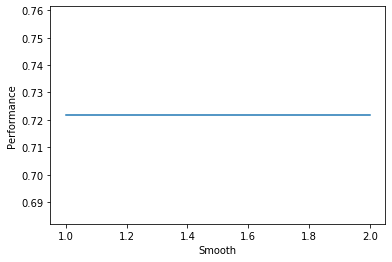

In [36]:
import matplotlib.pyplot as plt
plt.plot(smooth,performance)
plt.xlabel("Smooth")
plt.ylabel("Performance")
plt.show